#A. Setup & Load Dataset


In [19]:
import pandas as pd
from google.colab import drive

# 1. Mount Drive
drive.mount('/content/drive')

# 2. Path dataset yang BENAR
file_path = "/content/drive/MyDrive/Colab Notebooks/Machine_Learning/datakelulusanmahasiswa.xlsx"

# 3. Baca file Excel
df = pd.read_excel(file_path)

# 4. Tampilkan 10 data pertama
print("=== 10 Data Pertama ===")
display(df.head(10))

# 5. Info tipe data
print("\n=== Info Dataset ===")
print(df.info())

# 6. Cek missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== 10 Data Pertama ===


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
5,SUHARYONO,LAKI - LAKI,BEKERJA,27,BELUM MENIKAH,2.95,2.82,3.09,3.10,2.78,3.16,3.23,0.0,3.07,TERLAMBAT
6,FARIKHATUN NAZLI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,2.76,3.14,2.60,2.95,3.23,3.33,3.30,3.3,3.06,TEPAT
7,FIFI SUNALISA,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,2.62,2.89,2.32,2.50,2.50,2.86,3.05,2.5,2.91,TEPAT
8,HENDRIK MULIYANTO,PEREMPUAN,BEKERJA,25,MENIKAH,3.60,3.54,3.52,3.39,3.52,3.68,3.15,0.0,3.40,TERLAMBAT
9,IMAM AGUNG RIBOWO,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.71,2.55,1.77,2.11,1.93,2.13,1.78,0.2,2.20,TERLAMBAT



=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB
None

=== M

#B. Exploratory Data Analysis

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. BERSIHKAN NAMA KOLOM DULU (BIAR GAK KEYERROR IPK) ---
df.columns = df.columns.str.strip()      # hapus spasi kiri-kanan
df.columns = df.columns.str.replace('\xa0', '')  # hapus spasi aneh dari Excel
df.columns = df.columns.str.replace('\n', '')    # hapus newline

print("=== Nama kolom setelah dibersihkan ===")
print(df.columns.tolist())


# --- 2. Statistik Deskriptif ---
print("=== Statistik Deskriptif (Numerik) ===")
display(df.describe())

=== Nama kolom setelah dibersihkan ===
['NAMA', 'JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK', 'STATUS KELULUSAN']
=== Statistik Deskriptif (Numerik) ===


,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,372.000000,376.000000
mean,25.955145,2.854116,2.812322,2.900950,2.782137,2.782348,2.877256,2.531240,1.271828,2.933085
std,3.397103,0.412658,0.473725,0.589364,0.648495,0.593472,0.634412,0.757205,1.400914,0.460279
min,22.000000,0.330000,0.500000,0.160000,0.000000,0.200000,0.000000,0.000000,0.000000,0.870000
25%,24.000000,2.600000,2.550000,2.550000,2.460000,2.480000,2.590000,2.150000,0.000000,2.747500
50%,25.000000,2.860000,2.850000,2.980000,2.860000,2.850000,3.000000,2.610000,0.750000,3.010000
75%,27.000000,3.100000,3.105000,3.325000,3.200000,3.205000,3.315000,3.110000,2.750000,3.220000
max,50.000000,3.790000,3.960000,3.960000,3.910000,3.880000,4.000000,3.910000,4.000000,3.850000


Histogram IPK


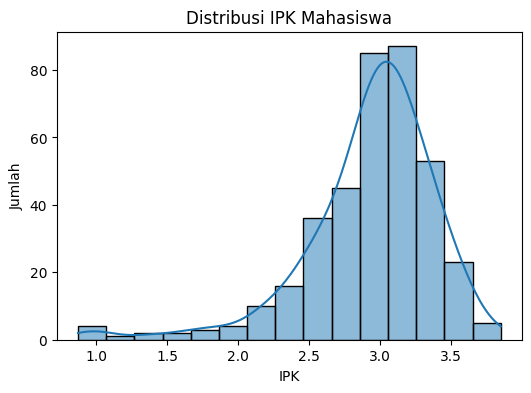

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(df['IPK'], bins=15, kde=True)
plt.title("Distribusi IPK Mahasiswa")
plt.xlabel("IPK")
plt.ylabel("Jumlah")
plt.show()


Countplot Status Kelulusan

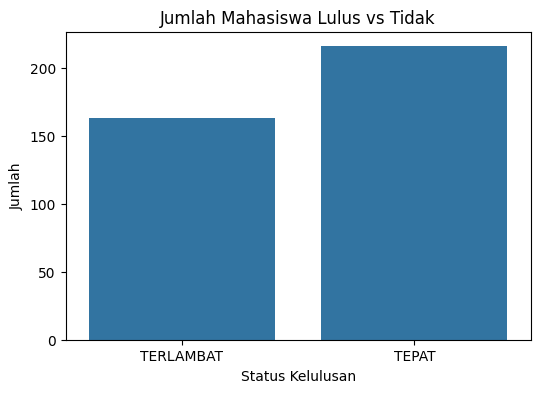

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['STATUS KELULUSAN'])
plt.title("Jumlah Mahasiswa Lulus vs Tidak")
plt.xlabel("Status Kelulusan")
plt.ylabel("Jumlah")
plt.show()

Boxplot IPK berdasarkan status kelulusan

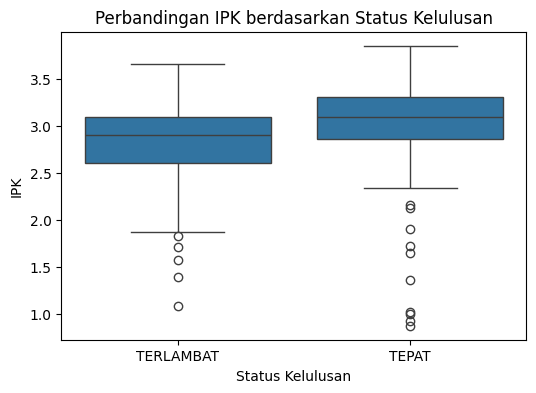

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['STATUS KELULUSAN'], y=df['IPK'])
plt.title("Perbandingan IPK berdasarkan Status Kelulusan")
plt.xlabel("Status Kelulusan")
plt.ylabel("IPK")
plt.show()

#C. PREPROCESSING

In [26]:
# 1. DROP kolom yang tidak diperlukan untuk model
df_clean = df.drop(columns=["NAMA"])   # Nama tidak dipakai untuk prediksi

# 2. Hapus baris yang ada missing value
df_clean = df_clean.dropna()

print("Shape setelah drop NA:", df_clean.shape)

# 3. Tentukan label (target)
kolom_label = "STATUS KELULUSAN"

# Encode label: TEPAT = 1, TERLAMBAT = 0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_clean[kolom_label] = le.fit_transform(df_clean[kolom_label])

print("Mapping Label:", dict(zip(le.classes_, le.transform(le.classes_))))

# 4. Pisahkan fitur & label
X = df_clean.drop(columns=[kolom_label])
y = df_clean[kolom_label]

# 5. One-hot encoding untuk kolom kategorikal
X = pd.get_dummies(X, drop_first=True)

print("Shape fitur setelah encoding:", X.shape)

# 6. Scaling fitur numerik
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaling selesai.")


Shape setelah drop NA: (369, 14)
Mapping Label: {'TEPAT': np.int64(0), 'TERLAMBAT': np.int64(1)}
Shape fitur setelah encoding: (369, 13)
Scaling selesai.


#D. TRAINING MODEL SVM + EVALUASI (FINAL)

Jumlah data training: 295
Jumlah data testing: 74

=== AKURASI MODEL ===
Akurasi: 0.9054

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

       TEPAT       0.86      0.94      0.90        34
   TERLAMBAT       0.95      0.88      0.91        40

    accuracy                           0.91        74
   macro avg       0.91      0.91      0.91        74
weighted avg       0.91      0.91      0.91        74



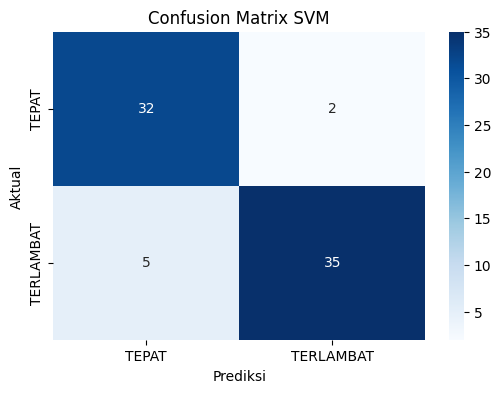

In [29]:
# ============================================
# D. TRAINING MODEL SVM + EVALUASI (FULL)
# ============================================

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Split Data (Training 80% - Testing 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

# 2. Buat Model SVM (kernel linear paling stabil)
model_svm = SVC(kernel="linear")
model_svm.fit(X_train, y_train)

# 3. Prediksi
y_pred = model_svm.predict(X_test)

# 4. Akurasi
acc = accuracy_score(y_test, y_pred)
print("\n=== AKURASI MODEL ===")
print(f"Akurasi: {acc:.4f}")

# 5. Classification Report
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 6. Confusion Matrix (Heatmap)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=le.classes_, yticklabels=le.classes_
)
plt.title("Confusion Matrix SVM")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()
